In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime,re

In [26]:

fraud_data = pd.read_csv('/home/nikit/Desktop/Take_home_Challenges/Fraudulent_Activity/Fraud_Data.csv')
ip_address = pd.read_csv('/home/nikit/Desktop/Take_home_Challenges/Fraudulent_Activity/IpAddress_to_Country.csv')


In [7]:
if len(fraud_data)==len(np.unique(fraud_data.user_id)):
    print 'ok'
len(fraud_data)

ok


151112

In [4]:
none = 'Not Found'
country = []
for i, ip_add in enumerate(fraud_data['ip_address']):
    temp = ip_address[(ip_add>=ip_address.lower_bound_ip_address) & (ip_add<=ip_address.upper_bound_ip_address)]
    if len(temp)==1:
        t = temp.country.values
        t = t[0]
        country.append(t)
    else:
        country.append(none)

fraud_data['country'] = country
fraud_data.country.value_counts()


United States                      58049
Not Found                          21966
China                              12038
Japan                               7306
United Kingdom                      4490
Korea Republic of                   4162
Germany                             3646
France                              3161
Canada                              2975
Brazil                              2961
Italy                               1944
Australia                           1844
Netherlands                         1680
Russian Federation                  1616
India                               1310
Taiwan; Republic of China (ROC)     1237
Mexico                              1121
Sweden                              1090
Spain                               1027
South Africa                         838
Switzerland                          785
Poland                               729
Argentina                            661
Indonesia                            649
Norway          

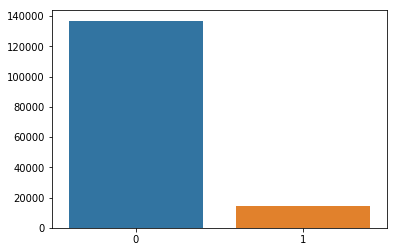

In [6]:
classes = fraud_data['class'].value_counts()
sns.barplot(x=classes.index,y=classes.values)
plt.show()

In [8]:
fraud_data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


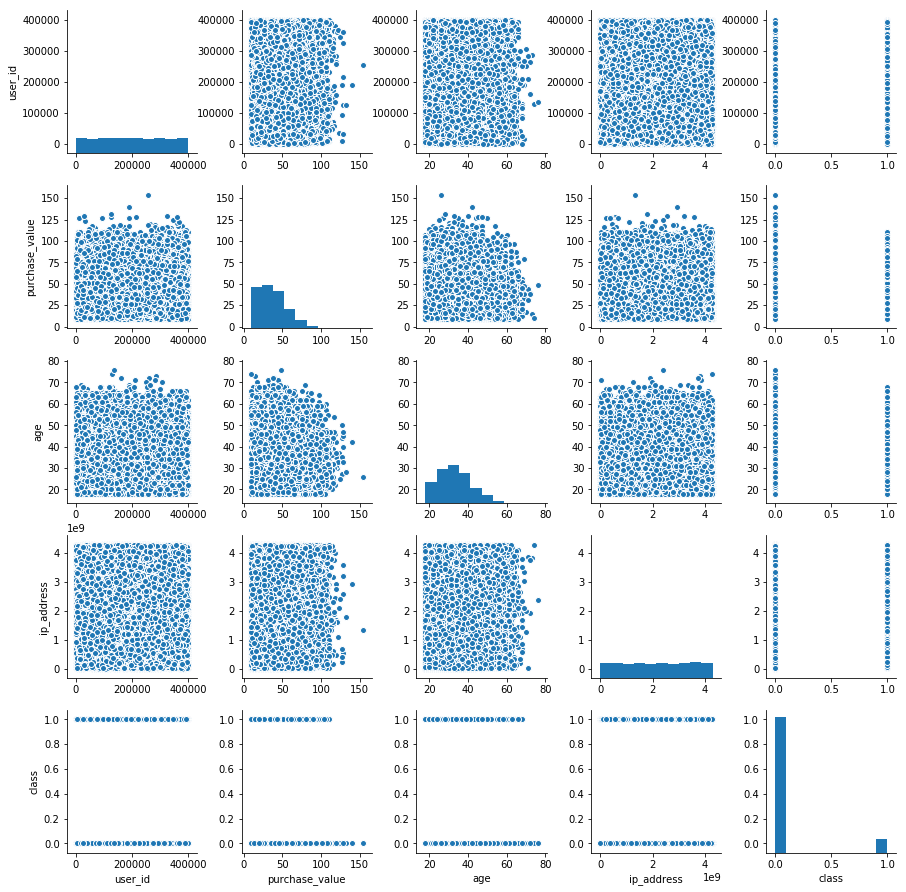

In [16]:
plt.figure(figsize=(10,10))
sns.pairplot(data=fraud_data)
plt.show()

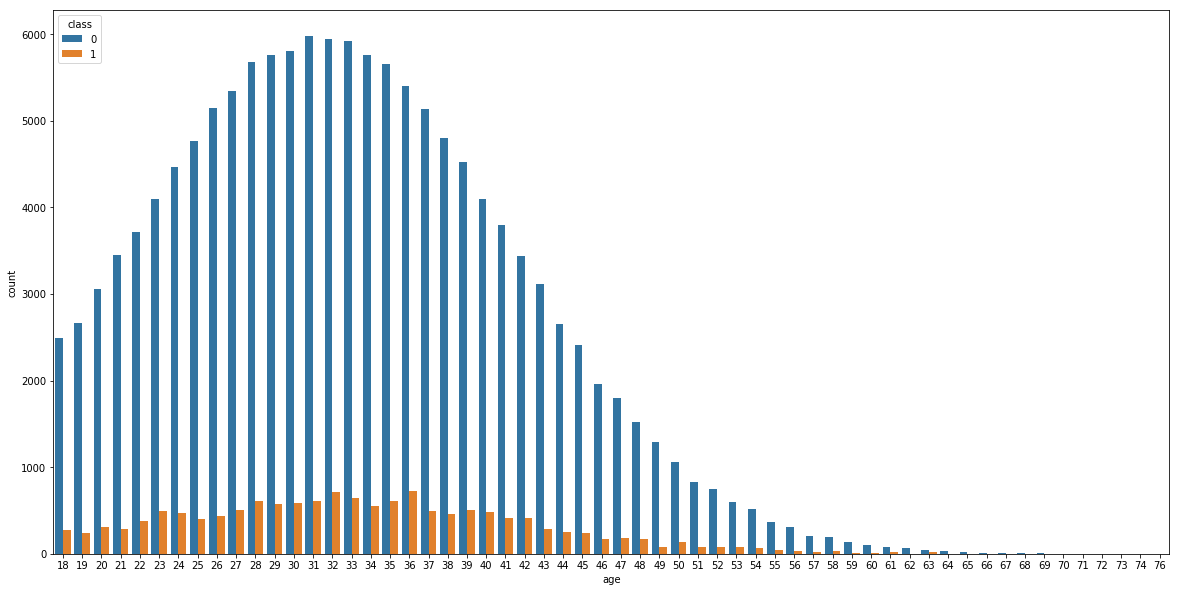

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x='age',hue='class',data=fraud_data)
plt.show()

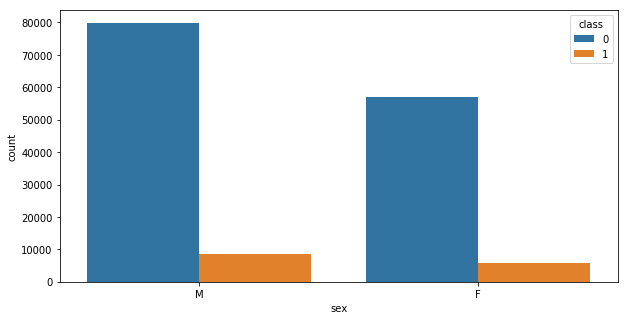

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='sex',hue='class',data=fraud_data)
plt.show()

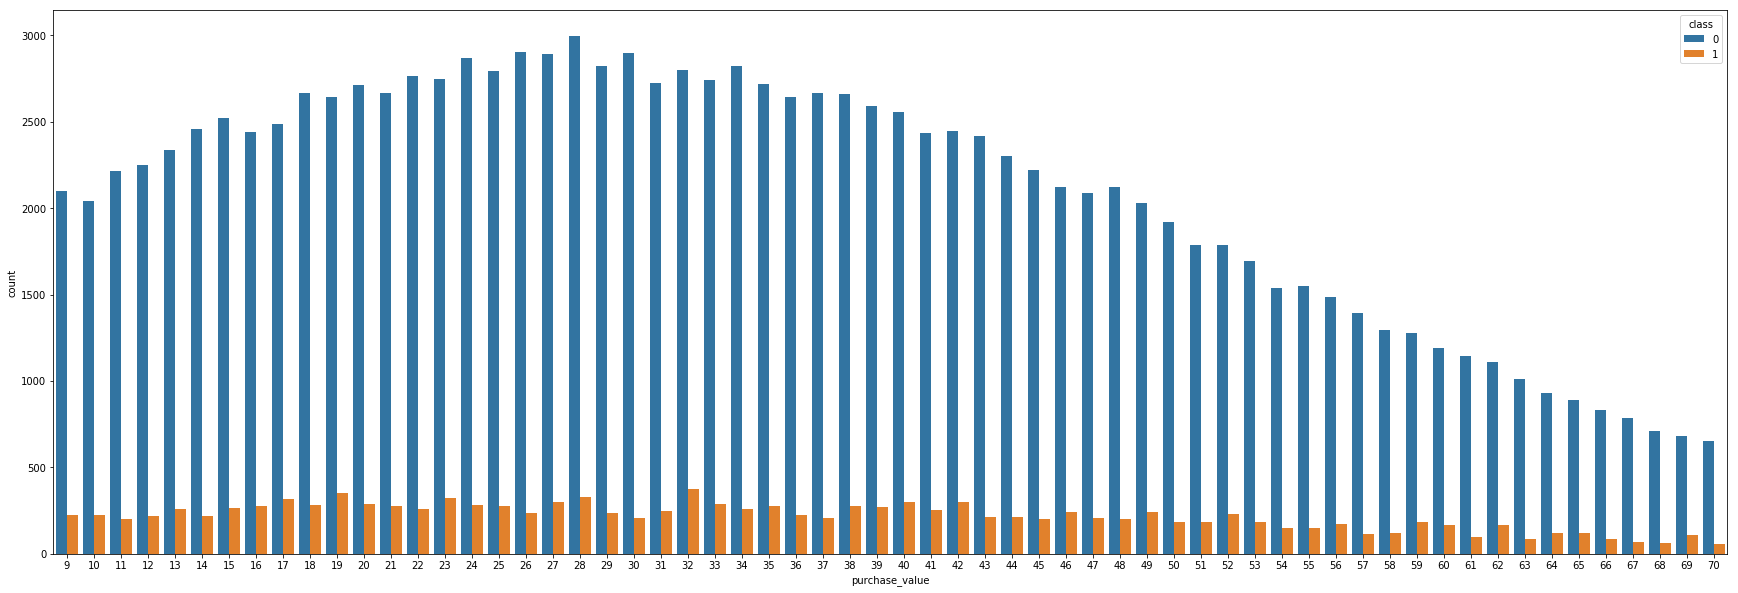

In [28]:
plt.figure(figsize=(30,10))
purchase_value_condition = fraud_data[fraud_data.purchase_value<=70]
sns.countplot(x='purchase_value',hue='class',data=purchase_value_condition)
plt.show()

In [38]:
fraud_data['device_id'].value_counts()

ZUSVMDEZRBDTX    20
NGQCKIADMZORL    20
CQTUVBYIWWWBC    20
KIPFSCNUGOLDP    20
EQYVNEGOFLAWK    20
ITUMJCKWEYNDD    20
IGKYVZDBEGALB    19
CDFXVYHOIHPYP    19
SDJQRPKXQFBED    19
BWSMVSLCJXMCM    19
EGLGSEGYPMMAM    19
UFBULQADXSSOG    18
XJWEQEWCBRAKD    18
OGBNHQHDZLGFZ    18
FFWAQIABHGYJC    18
RWZCXZTQUORQL    18
QVMVTZOIJDKNR    18
KPAAACGRQWYIK    18
XHZBVWFWHSGTQ    18
TAODVYWZTHMTO    18
GTIYVLCMAYBFA    18
KGXODJJIWSJJE    17
XSEQHFFOYFICY    17
RWCELJOVGBDVR    17
KYVPIVGZBEXNK    17
UHCAPOHBEBXJW    17
SUEKLSZWLASFR    17
QRMOMDDTIIUVW    17
FHNLMUKPGJGPZ    17
DNEKXSIEGFBWD    17
                 ..
KJNITSXBWVWQU     1
YGXBBSOEBKHUW     1
XTBDAYUKQYQRP     1
YRFQDBFJUFLUC     1
UCIJISJKCNHIX     1
VXTRLUMBQDTPX     1
BSQKDBFMFWDBX     1
EMGUDDVXZBRIZ     1
XKOHOBUEXVLWF     1
LPMBAGPOIETUE     1
NIVYEYOMMQUZV     1
WMEQFWGZQSQCW     1
GDCEKHFROERRS     1
VNEVKZZATPSSY     1
IOSMTTEPKRCAB     1
UPNVOEUNHRPDF     1
BJISKIWRXAJJL     1
ZGVYSEGUJEHEY     1
KSXZEJKFBBMRI     1


In [39]:
fraud_data['ip_address'].value_counts()

3.874758e+09    20
5.760609e+08    20
2.050964e+09    20
1.502818e+09    20
2.937899e+09    19
1.800550e+09    19
3.503224e+09    19
3.484934e+08    19
2.586669e+09    19
3.058785e+09    19
1.797069e+09    19
1.443896e+09    18
2.249217e+09    18
2.141692e+09    18
2.354318e+08    18
1.955530e+08    18
1.281304e+09    18
1.687739e+09    18
1.839748e+08    18
9.794124e+08    18
2.470359e+09    17
2.011989e+09    17
1.509973e+09    17
1.235453e+09    17
2.161077e+09    17
2.294137e+09    17
3.445652e+09    17
6.233199e+08    17
2.881396e+09    17
3.645562e+09    17
                ..
1.314423e+09     1
3.896761e+09     1
2.081674e+09     1
1.208879e+09     1
4.187075e+09     1
1.201447e+09     1
1.748791e+08     1
3.694881e+09     1
1.841112e+09     1
1.442817e+09     1
2.625951e+09     1
1.192997e+08     1
2.604958e+09     1
1.494229e+09     1
3.508405e+09     1
3.077081e+09     1
2.976366e+09     1
2.879706e+09     1
1.112672e+09     1
2.619358e+09     1
1.056479e+09     1
3.841902e+09

In [80]:
times = []
for i, time in enumerate(fraud_data['signup_time']):
    signup_time = time
    purchase_time = fraud_data['purchase_time'][i]
    date_format = '%Y-%m-%d %H:%M:%S'
    t1 = datetime.datetime.strptime(signup_time,date_format)
    t2 = datetime.datetime.strptime(purchase_time,date_format)
    diff = t2-t1
    times.append(diff.days*24+(diff.seconds/3600))
fraud_data['signup_purchase_diff'] = times


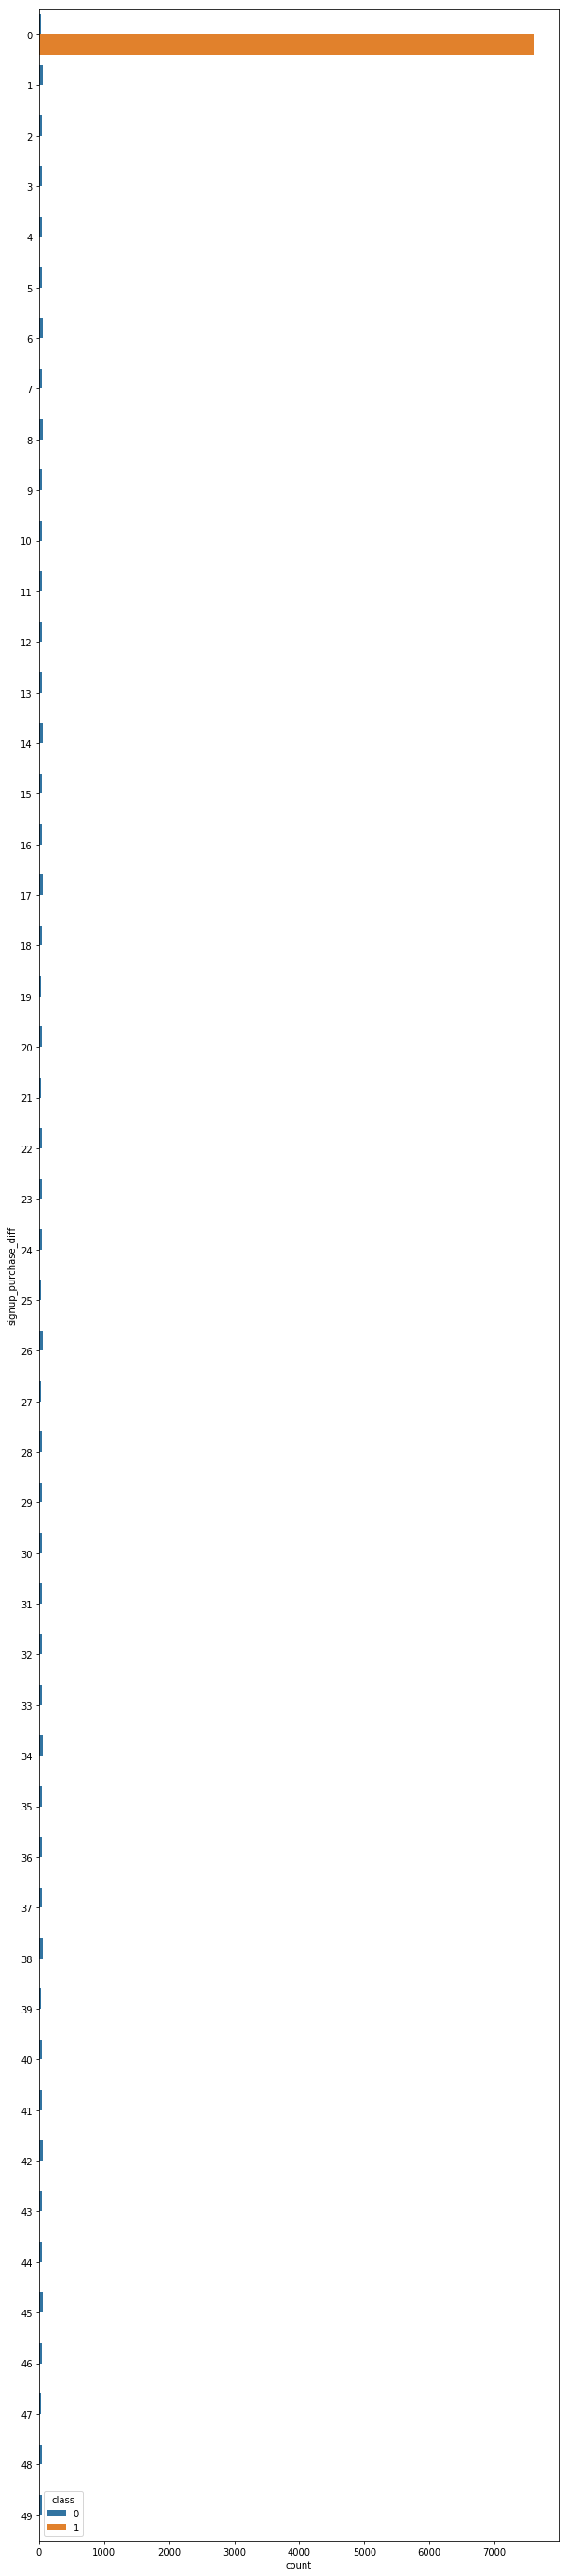

In [85]:
plt.figure(figsize=(10,50))
time = fraud_data[fraud_data['signup_purchase_diff']<50]
sns.countplot(y='signup_purchase_diff',hue='class',data=time)
plt.show()

In [88]:
signup_day = []
purchase_day = []
for i, time in enumerate(fraud_data['signup_time']):
    signup_time = time
    purchase_time = fraud_data['purchase_time'][i]
    date_format = '%Y-%m-%d %H:%M:%S'
    t1 = datetime.datetime.strptime(signup_time,date_format).strftime('%a')
    t2 = datetime.datetime.strptime(purchase_time,date_format).strftime('%a')
    signup_day.append(t1)
    purchase_day.append(t2)
fraud_data['signup_day'] = signup_day
fraud_data['purchase_day'] = purchase_day
fraud_data.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,signup_purchase_diff,signup_day,purchase_day
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1251,Tue,Sat
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,4,Sun,Mon
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0,Thu,Thu
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,136,Tue,Mon
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1211,Tue,Wed


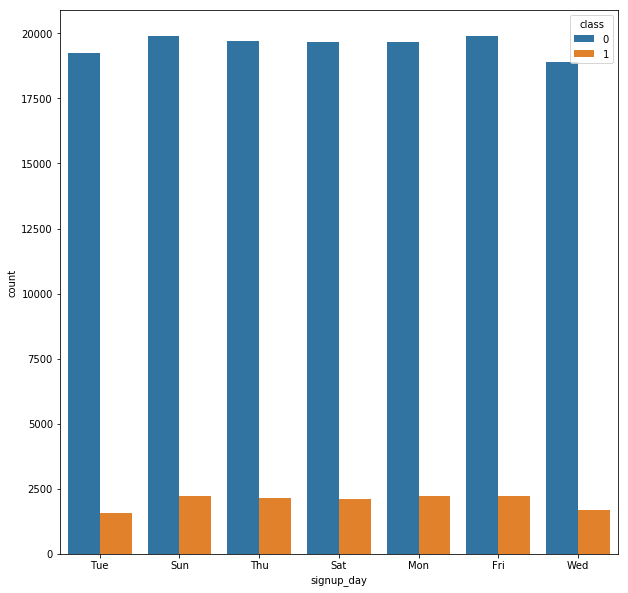

In [91]:
plt.figure(figsize=(10,10))
sns.countplot(x="signup_day",hue="class",data=fraud_data)
plt.show()

In [93]:
signup_week_number = []
purchase_week_number = []
for i, time in enumerate(fraud_data['signup_time']):
    signup_time = time
    purchase_time = fraud_data['purchase_time'][i]
    date_format = '%Y-%m-%d %H:%M:%S'
    t1 = datetime.datetime.strptime(signup_time,date_format).strftime('%W')
    t2 = datetime.datetime.strptime(purchase_time,date_format).strftime('%W')
    signup_week_number.append(t1)
    purchase_week_number.append(t2)
fraud_data['signup_week_number'] = signup_week_number
fraud_data['purchase_week_number'] = purchase_week_number


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,signup_purchase_diff,signup_day,purchase_day,signup_week_number,purchase_week_number
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1251,Tue,Sat,08,15
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,4,Sun,Mon,22,23
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0,Thu,Thu,00,00
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,136,Tue,Mon,17,18
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1211,Tue,Wed,29,36


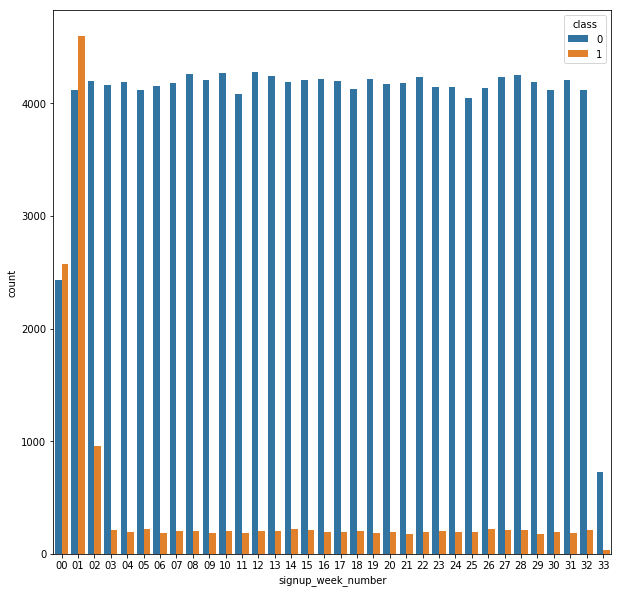

In [98]:
plt.figure(figsize=(10,10))
sns.countplot(x="signup_week_number",hue="class",data=fraud_data)
plt.show()


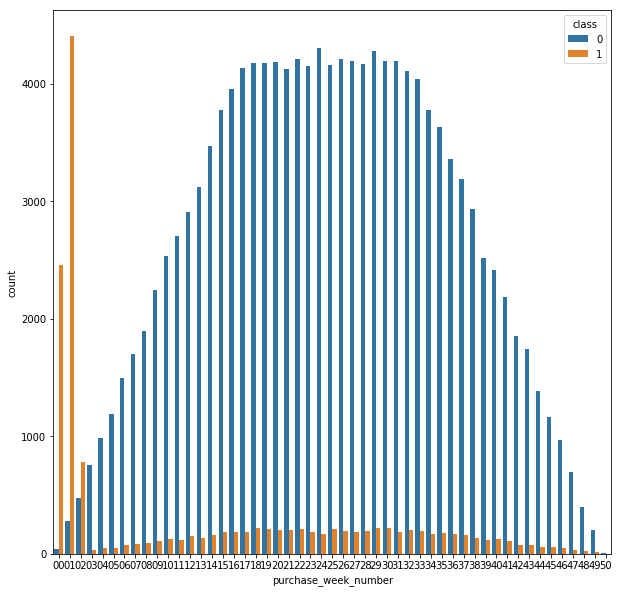

In [99]:
plt.figure(figsize=(10,10))
sns.countplot(x="purchase_week_number",hue="class",data=fraud_data)
plt.show()

In [100]:
fraud_data.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,signup_purchase_diff,signup_day,purchase_day,signup_week_number,purchase_week_number
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1251,Tue,Sat,08,15
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,4,Sun,Mon,22,23
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0,Thu,Thu,00,00
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,136,Tue,Mon,17,18
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1211,Tue,Wed,29,36


In [122]:
from sklearn.model_selection import train_test_split
columns = ['purchase_value','device_id','source','browser','sex','age','ip_address','signup_purchase_diff','signup_day','purchase_day',\
          'signup_week_number','purchase_week_number']
labels = ['class']
fraud_data['signup_day'] = pd.factorize(fraud_data['signup_day'])[0]
fraud_data['purchase_day'] = pd.factorize(fraud_data['purchase_day'])[0]
fraud_data['sex'] = pd.factorize(fraud_data['sex'])[0]
fraud_data['browser'] = pd.factorize(fraud_data['browser'])[0]
fraud_data['source'] = pd.factorize(fraud_data['source'])[0]
fraud_data['device_id'] = pd.factorize(fraud_data['device_id'])[0]
variables = np.array(fraud_data[columns])
target = np.array(fraud_data[labels])
X_train,X_test,y_train,y_test = train_test_split(variables,target,test_size=0.33,random_state=42)
target.shape

(151112, 1)

In [123]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)

/home/nikit/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [124]:
pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print confusion_matrix(y_test,pred)

[[45229     2]
 [ 2125  2511]]


In [125]:
print accuracy_score(y_test,pred)

0.957346541801


In [132]:
var_imp = clf.feature_importances_
v_imp = pd.DataFrame(list(zip(columns,var_imp)),columns=['feature','imp_level'])
v_imp

,feature,imp_level
0,purchase_value,0.054123
1,device_id,0.096252
2,source,0.010057
3,browser,0.018701
4,sex,0.007664
5,age,0.046894
6,ip_address,0.075172
7,signup_purchase_diff,0.325328
8,signup_day,0.025814
9,purchase_day,0.026082
